In [24]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from matplotlib import cm
import math

In [25]:
# PART A
x_i_raw = np.genfromtxt('./ass1_data/linearX.csv', delimiter=',')
y_i = np.genfromtxt('./ass1_data/linearY.csv', delimiter=',')
theta = np.array([0.00, 0.00])
m = x_i_raw.size
n = 0.5

# Normalize data
mean = 0
squared_sum = 0
for xi in x_i_raw:
    mean += xi
    squared_sum += xi*xi
mean = mean/m
e_x_squared = squared_sum/m
variance = e_x_squared - mean*mean

x_i_norm = np.array([(xi-mean)/math.sqrt(variance) for xi in x_i_raw])
x_i = np.array([[1, xi] for xi in x_i_norm])

In [26]:
# Detect Convergence
epsilon = 0.00000001
def converged(theta_next, theta):
    converged = True
    for d in range(theta.size):
        converged = converged and abs(theta_next[d] - theta[d]) < epsilon
    return converged

# Update Graph for PART C
def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

def compute_error(theta_0, theta_1):
    error = 0
    for i in range(m):
        hyp = theta_1*x_i[i][1] + theta_0
        error += (y_i[i]-hyp)*(y_i[i]-hyp)
    error = error/(2*m)
    return error

In [27]:
# Gradient Descent
num_iterations = 0
total_iterations = 10

# Arrays ti hold parameter values for all iterations
theta_0, theta_1, error_func = [], [], []
curve = []

while(True):
    theta_next = np.array([0.00, 0.00])
    j_theta = 0
    for j in range(theta.size):
        sum = 0
        for i in range(m):
            hyp = np.dot(theta, x_i[i])
            sum = sum + x_i[i][j]*(y_i[i] - hyp)
            j_theta = j_theta + (y_i[i] - hyp)*(y_i[i] - hyp)
        theta_next[j] = theta[j] + n*sum/m
        
    if (converged(theta_next, theta)):
        break
        
    j_theta = j_theta/(4*m)
    theta_0.append(theta[0])
    theta_1.append(theta[1])
    error_func.append(j_theta)
    
    theta = theta_next
    num_iterations += 1
    
print (theta)
print (num_iterations)

[0.99662009 0.0013402 ]
26


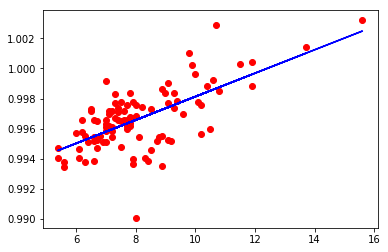

In [28]:
# Plot Graphs for PART B
h_theta = np.array([np.dot(theta, xi) for xi in x_i])
plt.plot(x_i_raw, y_i, 'ro')
plt.plot(x_i_raw, h_theta, 'b-')

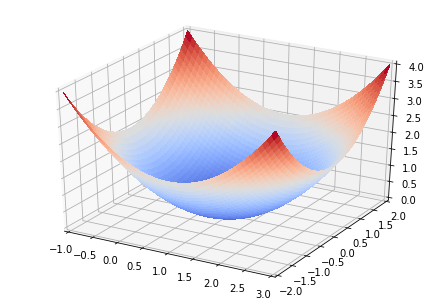

In [29]:
fig = plt.figure()
ax = p3.Axes3D(fig)

# Plot for PART C
# Set Axes Properties
theta_0_min, theta_0_max = -1, 3
theta_1_min, theta_1_max = -2, 2
error_func_min, error_func_max = 0, 4
ax.set_xlim3d([theta_0_min, theta_0_max])
ax.set_ylim3d([theta_1_min, theta_1_max])
ax.set_zlim3d([error_func_min, error_func_max])

# Make surface plot
theta_0_surface = np.linspace(theta_0_min, theta_0_max, 300)
theta_1_surface = np.linspace(theta_1_min, theta_1_max, 300)
theta_0_surface, theta_1_surface = np.meshgrid(theta_0_surface, theta_1_surface)    
error_func_surface = compute_error(theta_0_surface, theta_1_surface)

# Plot the error function surface
ax.plot_surface(theta_0_surface, theta_1_surface, error_func_surface, cmap = cm.coolwarm, 
                linewidth=0, antialiased=False)

# Plot error curve versus parameters
curve = [np.array([theta_0, theta_1, error_func])]
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], 'r.')[0] for dat in curve]
ani = animation.FuncAnimation(fig, update_lines, num_iterations-1, fargs=(curve, lines), 
                              interval=200, blit=True)
plt.show()

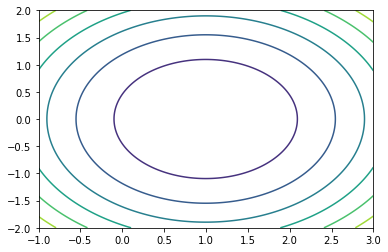

In [30]:
# Plot contour for PART D
plt.ion()
contour_plot = plt.plot([], [], 'r.')[0]
plt.contour(theta_0_surface, theta_1_surface, error_func_surface)

for i in range(num_iterations-1):
    contour_plot.set_xdata(theta_0[:i])
    contour_plot.set_ydata(theta_1[:i])
    plt.pause(0.2)
    
plt.show()